In [1]:
!pip install pandas seaborn transformers tqdm numpy nltk

In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from transformers import BartTokenizerFast
import nltk
nltk.download("punkt")

from common import *

[nltk_data] Downloading package punkt to /home/caste/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
dataset = json.load(open(aggregated_dataset_file, "r"))
tokenizer = BartTokenizerFast.from_pretrained("facebook/bart-base")

### Convert JSON nested dataset to CSV-like tabular format

In [4]:
tabular_dataset = []
# essentially flatmap
with tqdm(range(sum(len(c['lectures']) for c in dataset))) as progress_bar:
    for course in dataset:
        for lecture in course['lectures']:
            tabular_dataset.append({
                'from_subset': course['from_subset'],
                'course_title': course['title'],
                'course_url': course['url'],
                'lecture_title': lecture['title'],
                'transcript': lecture['transcript'],
                'transcript_length_characters': len(lecture['transcript']),
                'transcript_length_tokens': len(tokenizer(lecture['transcript'])['input_ids']),
                'transcript_length_words': len(nltk.word_tokenize(lecture['transcript'])),
                'transcript_length_sentences': len(nltk.sent_tokenize(lecture['transcript'])),
            })
            progress_bar.update()

  0%|          | 0/15229 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (3332 > 1024). Running this sequence through the model will result in indexing errors


In [5]:
df = pd.DataFrame(tabular_dataset)
df

,from_subset,course_title,course_url,lecture_title,transcript,transcript_length_characters,transcript_length_tokens,transcript_length_words,transcript_length_sentences
0,mitocw,Introduction to Special Relativity,https://ocw.mit.edu/courses/8-20-introduction-...,Week 1: Foundations of Special Relativity\nLEC...,MARKUS KLUTE: Welcome to 8.20. Welcome to Spec...,14972,3332,3233,207
1,mitocw,Introduction to Special Relativity,https://ocw.mit.edu/courses/8-20-introduction-...,Week 1: Foundations of Special Relativity\nLEC...,"PROFESSOR: Hello, and welcome back to 8.20, sp...",11046,2466,2256,137
2,mitocw,Introduction to Special Relativity,https://ocw.mit.edu/courses/8-20-introduction-...,Week 1: Foundations of Special Relativity\nLEC...,MARKUS KLUTE: Welcome back to 8.20- Special Re...,7854,1679,1605,94
3,mitocw,Introduction to Special Relativity,https://ocw.mit.edu/courses/8-20-introduction-...,Week 1: Foundations of Special Relativity\nLEC...,PROFESSOR: So I'm going to come to 8.20- Speci...,72049,15301,14485,773
4,mitocw,Introduction to Special Relativity,https://ocw.mit.edu/courses/8-20-introduction-...,Week 1: Foundations of Special Relativity\nLEC...,MARKUS KLUTE: Welcome back to 8.20 Special Rel...,2633,550,506,30
...,...,...,...,...,...,...,...,...,...
15224,yale,Fundamentals of Physics with Ramamurti Shankar,https://www.youtube.com/playlist?list=PLFE3074...,20. Fluid Dynamics and Statics and Bernoulli's...,Professor Ramamurti Shankar: This is a relativ...,60571,14732,13811,850
15225,yale,Fundamentals of Physics with Ramamurti Shankar,https://www.youtube.com/playlist?list=PLFE3074...,21. Thermodynamics,"Professor Ramamurti Shankar: Alright class, we...",64333,14719,14226,724
15226,yale,Fundamentals of Physics with Ramamurti Shankar,https://www.youtube.com/playlist?list=PLFE3074...,22. The Boltzmann Constant and First Law of Th...,"So, I had to leave you in the middle of someth...",64480,15115,14416,834
15227,yale,Fundamentals of Physics with Ramamurti Shankar,https://www.youtube.com/playlist?list=PLFE3074...,23. The Second Law of Thermodynamics and Carno...,Professor Ramamurti Shankar: What I did yester...,55343,13676,12686,718


In [6]:
df.dtypes

from_subset                     object
course_title                    object
course_url                      object
lecture_title                   object
transcript                      object
transcript_length_characters     int64
transcript_length_tokens         int64
transcript_length_words          int64
transcript_length_sentences      int64
dtype: object

In [7]:
df['from_subset'].value_counts()

vtssum     9616
mitocw     3547
yale       1096
openhpi     970
Name: from_subset, dtype: int64

In [8]:
df[['from_subset', 'course_title', 'course_url', 'lecture_title', 'transcript']].describe()

,from_subset,course_title,course_url,lecture_title,transcript
count,15229,15229,15229,15229,15229
unique,4,198,198,13655,14782
top,vtssum,videolectures.net,http://videolectures.net,Poster Spotlights,The following content is provided under a Crea...
freq,9616,9616,9616,24,9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15229 entries, 0 to 15228
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   from_subset                   15229 non-null  object
 1   course_title                  15229 non-null  object
 2   course_url                    15229 non-null  object
 3   lecture_title                 15229 non-null  object
 4   transcript                    15229 non-null  object
 5   transcript_length_characters  15229 non-null  int64 
 6   transcript_length_tokens      15229 non-null  int64 
 7   transcript_length_words       15229 non-null  int64 
 8   transcript_length_sentences   15229 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


#### Notes
1. We don't have any null transcript ✅
2. We have a few (15229 - 13655 = 1574) lecture title duplicates
3. We have a few (15229 - 14778 = 451) transcript duplicates

### Filter transcripts with length < 500 characters
500 is chosen arbitrarily as a small minimum threshold a transcript should pass. This is to filter very short transcripts, which cannot belong to a video lecture. We can see from the transcript lengths percentiles table below that the large majority of transcripts is longer than this threshold.

In [10]:
_df_len_before = len(df)
df = df[df['transcript_length_characters'] > 500].copy()
_df_len_after = len(df)
print(f"Removed {_df_len_before - _df_len_after} short transcripts.")

Removed 112 short transcripts.


### Remove duplicate transcripts

In [11]:
df_len_before = len(df)
df.drop_duplicates(subset=['transcript'], keep="first", inplace=True)
_df_len_after = len(df)
print(f"Removed {_df_len_before - _df_len_after} duplicate transcripts.")

Removed 552 duplicate transcripts.


In [12]:
df[['from_subset', 'course_title', 'course_url', 'lecture_title', 'transcript']].describe()

,from_subset,course_title,course_url,lecture_title,transcript
count,14677,14677,14677,14677,14677
unique,4,198,198,13417,14677
top,vtssum,videolectures.net,http://videolectures.net,Poster Spotlights,MARKUS KLUTE: Welcome to 8.20. Welcome to Spec...
freq,9229,9229,9229,23,1


In [13]:
df[df['from_subset'] == "mitocw"]['course_url'].describe()

count                                                  3397
unique                                                  126
top       https://ocw.mit.edu/courses/res-6-012-introduc...
freq                                                    241
Name: course_url, dtype: object

In [14]:
df[df['from_subset'] == "openhpi"]['course_url'].describe()

count                                                   957
unique                                                   28
top       https://open.hpi.de/courses/hpi-learningatscal...
freq                                                     87
Name: course_url, dtype: object

In [15]:
df[df['from_subset'] == "vtssum"]['course_url'].describe()

count                         9229
unique                           1
top       http://videolectures.net
freq                          9229
Name: course_url, dtype: object

In [16]:
df[df['from_subset'] == "yale"]['course_url'].describe()

count                                                  1094
unique                                                   43
top       https://www.youtube.com/playlist?list=PL3F629F...
freq                                                     36
Name: course_url, dtype: object

In [17]:
# df[df['lecture_title'] == "Poster Spotlights"]  # these are all different even if they have the same lecture title

In [18]:
df['from_subset'].value_counts()

vtssum     9229
mitocw     3397
yale       1094
openhpi     957
Name: from_subset, dtype: int64

### Transcript lengths distribution

In [19]:
df[['transcript_length_tokens', 'transcript_length_words', 'transcript_length_sentences', 'transcript_length_characters']].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.989, 0.99])

,transcript_length_tokens,transcript_length_words,transcript_length_sentences,transcript_length_characters
count,14677.000000,14677.000000,14677.000000,14677.000000
mean,4355.428153,4148.813313,240.148191,19905.514547
std,4175.271288,3946.232018,239.858661,18386.998503
min,102.000000,97.000000,1.000000,508.000000
25%,1302.000000,1251.000000,69.000000,6301.000000
50%,2487.000000,2402.000000,139.000000,11954.000000
75%,6952.000000,6606.000000,361.000000,31268.000000
90%,10842.800000,10240.800000,593.000000,48351.400000
95%,13228.600000,12521.200000,741.000000,58259.600000
98.9%,16255.588000,15451.948000,1006.000000,72102.588000


As we can see from the table above, **98.9% of transcripts are within LED's 16384 maximum token length**.

In [20]:
#sns.set(rc={"figure.figsize": (8, 4.5)})  # change seaborn plot size
#sns.set_style("ticks", {'axes.grid' : True})
#sns.set(style="ticks")
#sns.reset_defaults()
sns.set_style("whitegrid")

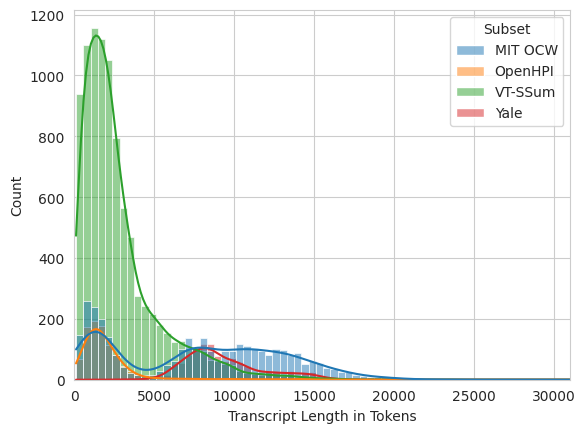

In [21]:
# docs: https://seaborn.pydata.org/generated/seaborn.histplot.html
# custom legend: https://stackoverflow.com/a/45211976
# good color palettes are viridis and icefire (but the colors are similar): https://seaborn.pydata.org/tutorial/color_palettes.html
axes = sns.histplot(df, x="transcript_length_tokens", hue="from_subset", kde=True)
axes.set(xlabel="Transcript Length in Tokens", xlim=(0, max(df['transcript_length_tokens'])))
axes.legend_.set_title("Subset")
for t, l in zip(axes.legend_.texts, ["MIT OCW", "OpenHPI", "VT-SSum", "Yale"]):
    t.set_text(l)
fig = axes.get_figure()
fig.savefig("openultd_transcript_length_tokens_distribution.svg")

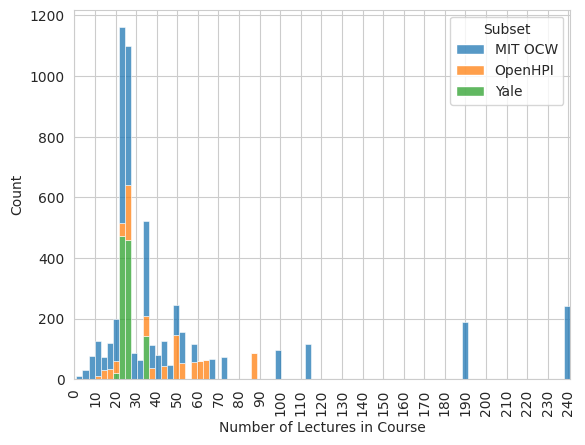

In [22]:
# length of courses in terms of lectures (exclude VT-SSum)

df_courses = df[df['from_subset'] != "vtssum"].copy()
# https://stackoverflow.com/a/63255023
df_courses['lectures_number'] = df_courses['course_url'].map(df_courses['course_url'].value_counts())

axes = sns.histplot(df_courses, x="lectures_number", hue="from_subset", kde=False, multiple="stack")
axes.set(xlabel="Number of Lectures in Course", xlim=(0, max(df_courses['lectures_number'])), xticks=range(0, max(df_courses['lectures_number']), 10))
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.legend_.set_title("Subset")
for t, l in zip(axes.legend_.texts, ["MIT OCW", "OpenHPI", "Yale"]):
    t.set_text(l)
fig = axes.get_figure()
fig.savefig("openultd_lectures_per_course_distribution.svg")

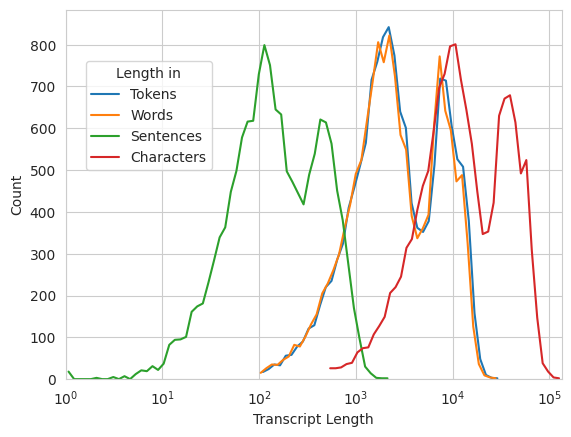

In [23]:
# correlation between the four types of transcript length
transcript_length_keys = ["transcript_length_tokens", "transcript_length_words", "transcript_length_sentences", "transcript_length_characters"]
for x in transcript_length_keys:
    axes = sns.histplot(df, x=x, element="poly", log_scale=True, fill=False)
    axes.set(xlabel="Transcript Length", xlim=(1, max(df['transcript_length_characters'])))

fig = axes.get_figure()
fig.legend(title="Length in", loc=(0.15, 0.61), labels=[k.split("_")[-1].title() for k in transcript_length_keys])
fig.savefig("openultd_transcript_length_tokens_vs_words_vs_sentences_vs_characters.svg")

### Save space
1. keep only "transcript" column
2. rename it to "text" (see [here](https://github.com/huggingface/transformers/blob/7032e0203262ebb2ebf55da8d2e01f873973e835/examples/pytorch/language-modeling/run_mlm.py#L276)).

In [24]:
df = df[['transcript']].copy()

In [25]:
df.rename(columns={'transcript': 'text'}, inplace=True)

In [26]:
df.head(2)

,text
0,MARKUS KLUTE: Welcome to 8.20. Welcome to Spec...
1,"PROFESSOR: Hello, and welcome back to 8.20, sp..."


### Split dataset into train, dev, test

In [27]:
seed = 42

np.random.seed(seed)
train_split = 0.8
dev_split = test_split = 0.1

# only make test split if needed
make_test_split = False

In [28]:
if not make_test_split:
    train_split += test_split
    test_split = 0.

train, dev, test = np.split(
    df.sample(frac=1, random_state=seed),
    [int(train_split * len(df)), int((train_split + dev_split) * len(df))],
)
len(train), len(train) / len(df), len(dev), len(dev) / len(df), len(test), len(test) / len(df), len(train) + len(dev) + len(test) == len(df)

(13209, 0.8999795598555563, 1468, 0.10002044014444368, 0, 0.0, True)

In [29]:
train.head(3)

,text
5569,"I have 40 minutes or something, right? Yeah. J..."
1487,PROFESSOR: interpretation of the wave function...
13320,Welcome to the lecture on the Muse project. Mu...


In [30]:
dev.head(3)

,text
1239,"Last week, we discussed the kinematics of moti..."
13565,So in this talk I will present you the work I'...
5146,What I'm going to talk about is stochastic con...


In [31]:
if make_test_split:
    test.head(3)

### Save dataset as CSV files

In [32]:
train.to_csv(train_split_csv_file)
dev.to_csv(dev_split_csv_file)
if make_test_split:
    test.to_csv(test_split_csv_file)